1st point answer


We chose the News Headlines Dataset for Sarcasm Detection because it is a well-structured, publicly available dataset curated specifically for sarcasm classification. It contains labeled examples (is_sarcastic) that directly support supervised learning tasks. Unlike random Twitter scrapes, this dataset is cleaner, easier to preprocess, and widely used in sarcasm detection research, which makes our results more comparable with existing studies.

2nd point answer

In [ ]:
import pandas as pd


df = pd.read_json("Sarcasm_Headlines_Dataset.json", lines=True)

print(df.head())
print("\n")
print("\n")
print(df.info())
print("\n")
print("\n")
print(df['is_sarcastic'].value_counts())


                                        article_link  \
0  https://www.huffingtonpost.com/entry/versace-b...   
1  https://www.huffingtonpost.com/entry/roseanne-...   
2  https://local.theonion.com/mom-starting-to-fea...   
3  https://politics.theonion.com/boehner-just-wan...   
4  https://www.huffingtonpost.com/entry/jk-rowlin...   

                                            headline  is_sarcastic  
0  former versace store clerk sues over secret 'b...             0  
1  the 'roseanne' revival catches up to our thorn...             0  
2  mom starting to fear son's web series closest ...             1  
3  boehner just wants wife to listen, not come up...             1  
4  j.k. rowling wishes snape happy birthday in th...             0  




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26709 entries, 0 to 26708
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   article_link  26709 non-null  object
 1   headli

answer to 3rd point


Dataset is relatively small (~28k rows) compared to real-world sarcasm data (millions needed).

Only headlines are included (no conversation or tweet context).

Binary labeling (sarcastic / not sarcastic) — but sarcasm can be multi-level or contextual.

Possible class imbalance between sarcastic vs non-sarcastic.

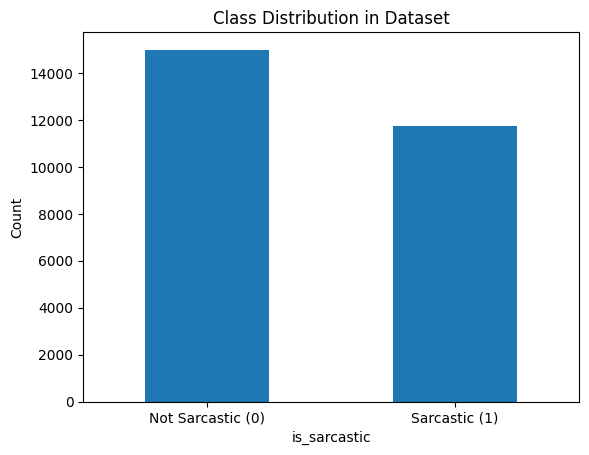

In [ ]:
# %pip install matplotlib
import matplotlib.pyplot as plt

df['is_sarcastic'].value_counts().plot(kind='bar')
plt.xticks([0,1], ['Not Sarcastic (0)', 'Sarcastic (1)'], rotation=0)
plt.ylabel("Count")
plt.title("Class Distribution in Dataset")
plt.show()


4th point


In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

nltk.download('stopwords')
nltk.download('wordnet')

# Load dataset
df = pd.read_json("Sarcasm_Headlines_Dataset.json", lines=True)

# Keep only relevant columns
df = df[['headline', 'is_sarcastic']]

# Initialize stopwords + lemmatizer
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

# Cleaning function
def clean_text(text):
    text = text.lower()                           # lowercase
    text = re.sub(r'http\S+|www.\S+', '', text)   # remove URLs
    text = re.sub(r'[^a-z\s]', '', text)          # remove punctuation/numbers
    tokens = text.split()                         # tokenize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

# Apply cleaning
df['clean_headline'] = df['headline'].apply(clean_text)

# Show before vs after
print(df[['headline', 'clean_headline']].head(10))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


                                            headline  \
0  former versace store clerk sues over secret 'b...   
1  the 'roseanne' revival catches up to our thorn...   
2  mom starting to fear son's web series closest ...   
3  boehner just wants wife to listen, not come up...   
4  j.k. rowling wishes snape happy birthday in th...   
5                        advancing the world's women   
6     the fascinating case for eating lab-grown meat   
7  this ceo will send your kids to school, if you...   
8  top snake handler leaves sinking huckabee camp...   
9  friday's morning email: inside trump's presser...   

                                      clean_headline  
0  former versace store clerk sue secret black co...  
1  roseanne revival catch thorny political mood b...  
2  mom starting fear son web series closest thing...  
3  boehner want wife listen come alternative debt...  
4   jk rowling wish snape happy birthday magical way  
5                              advancing world woman 

5th point


checking class distribution checking after some preprocessing steps

/tmp/ipython-input-83502894.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='is_sarcastic', data=df, palette='viridis')


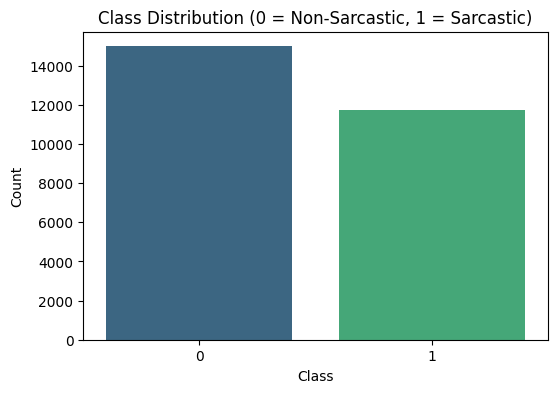

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x='is_sarcastic', data=df, palette='viridis')
plt.title("Class Distribution (0 = Non-Sarcastic, 1 = Sarcastic)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


headline length distributor

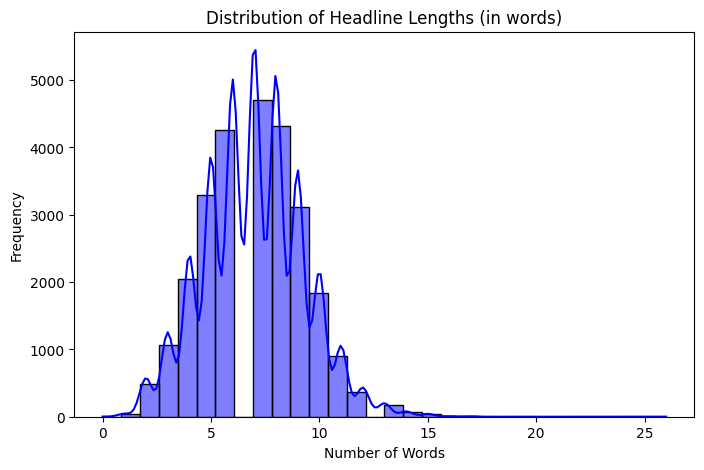

In [ ]:
df['headline_length'] = df['clean_headline'].apply(lambda x: len(x.split()))

plt.figure(figsize=(8,5))
sns.histplot(df['headline_length'], bins=30, kde=True, color='blue')
plt.title("Distribution of Headline Lengths (in words)")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()


most frequent words ploting

C:\Users\Prateek Sharma\AppData\Local\Temp\ipykernel_17224\2206931406.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[w[0] for w in counter_sarcastic], y=[w[1] for w in counter_sarcastic], palette="magma")


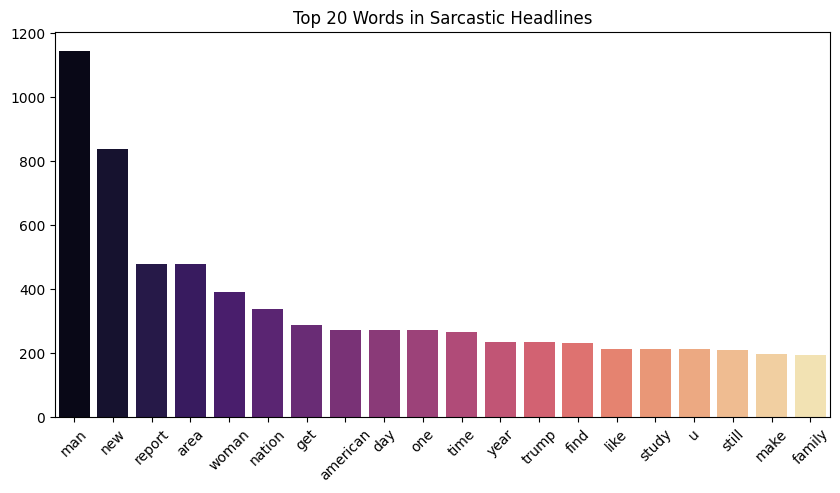

C:\Users\Prateek Sharma\AppData\Local\Temp\ipykernel_17224\2206931406.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[w[0] for w in counter_nonsarcastic], y=[w[1] for w in counter_nonsarcastic], palette="coolwarm")


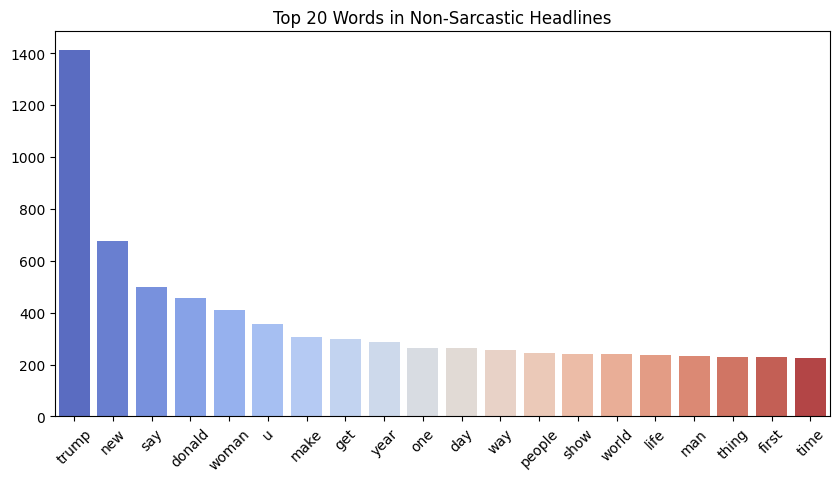

In [ ]:
from collections import Counter

# Get top 20 words from sarcastic headlines
sarcastic_words = " ".join(df[df['is_sarcastic']==1]['clean_headline']).split()
counter_sarcastic = Counter(sarcastic_words).most_common(20)

plt.figure(figsize=(10,5))
sns.barplot(x=[w[0] for w in counter_sarcastic], y=[w[1] for w in counter_sarcastic], palette="magma")
plt.title("Top 20 Words in Sarcastic Headlines")
plt.xticks(rotation=45)
plt.show()

# Get top 20 words from non-sarcastic headlines
nonsarcastic_words = " ".join(df[df['is_sarcastic']==0]['clean_headline']).split()
counter_nonsarcastic = Counter(nonsarcastic_words).most_common(20)

plt.figure(figsize=(10,5))
sns.barplot(x=[w[0] for w in counter_nonsarcastic], y=[w[1] for w in counter_nonsarcastic], palette="coolwarm")
plt.title("Top 20 Words in Non-Sarcastic Headlines")
plt.xticks(rotation=45)
plt.show()


## Traditional Embedding

In [ ]:
# =======================
# TRADITIONAL EMBEDDINGS PIPELINE (Count, TF-IDF, Co-occurrence)
# =======================

# ---- Step 1: Setup ----
import pandas as pd
import numpy as np
from tqdm import tqdm
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# ---- Step 2: Load Dataset ----
data = pd.read_json("data/Sarcasm_Headlines_Dataset.json", lines=True)
texts = data['headline']
labels = data['is_sarcastic']

# ---- Step 3: Train/Test Split ----
X_train, X_test, y_train, y_test = train_test_split(
    texts, labels, test_size=0.2, stratify=labels, random_state=42
)

# ---- Step 4: Helper Function ----
def evaluate_vectorizer(vectorizer, model_name, apply_svd=False, n_components=100):
    # Fit only on training data
    X_train_vec = vectorizer.fit_transform(X_train)
    X_test_vec  = vectorizer.transform(X_test)

    # Optional dimensionality reduction (for co-occurrence)
    if apply_svd:
        svd = TruncatedSVD(n_components=n_components, random_state=42)
        X_train_vec = svd.fit_transform(X_train_vec)
        X_test_vec  = svd.transform(X_test_vec)

    # Train classifier
    clf = LogisticRegression(max_iter=300)
    clf.fit(X_train_vec, y_train)
    y_pred = clf.predict(X_test_vec)

    # Results
    print(f"\n===== {model_name} =====")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))

# ---- Step 5: Run Models ----

# Count Vectorizer (BoW)
print("\nTraining Bag of Words...")
bow = CountVectorizer(lowercase=True, stop_words="english")
evaluate_vectorizer(bow, "Count Vectorizer (BoW)")

# TF-IDF
print("\nTraining TF-IDF...")
tfidf = TfidfVectorizer(lowercase=True, stop_words="english")
evaluate_vectorizer(tfidf, "TF-IDF")

# Co-occurrence Matrix with SVD (LSA-style)
print("\nTraining Co-occurrence Matrix with SVD...")
cooc = CountVectorizer(lowercase=True, stop_words="english", ngram_range=(1,1))
# note: CountVectorizer builds word-document matrix (not word-word directly)
# Applying SVD turns it into dense semantic-like embeddings (LSA)
evaluate_vectorizer(cooc, "Co-occurrence Matrix + SVD (LSA)", apply_svd=True, n_components=100)



Training Bag of Words...

===== Count Vectorizer (BoW) =====
Accuracy: 0.798764507675028
              precision    recall  f1-score   support

           0       0.80      0.86      0.83      2997
           1       0.80      0.72      0.76      2345

    accuracy                           0.80      5342
   macro avg       0.80      0.79      0.79      5342
weighted avg       0.80      0.80      0.80      5342


Training TF-IDF...

===== TF-IDF =====
Accuracy: 0.7935230250842381
              precision    recall  f1-score   support

           0       0.78      0.87      0.83      2997
           1       0.81      0.69      0.75      2345

    accuracy                           0.79      5342
   macro avg       0.80      0.78      0.79      5342
weighted avg       0.80      0.79      0.79      5342


Training Co-occurrence Matrix with SVD...

===== Co-occurrence Matrix + SVD (LSA) =====
Accuracy: 0.6813927368026956
              precision    recall  f1-score   support

           0  

## static embedding

In [ ]:
# =======================
# STATIC EMBEDDINGS PIPELINE (Reorganized)
# =======================

# ---- Step 1: Setup ----
import pandas as pd
import re
import nltk
import numpy as np
from tqdm import tqdm
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

import gensim.downloader as api
from gensim.models import Word2Vec, FastText
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

# Download NLTK resources
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# ---- Step 2: Load Dataset ----
data = pd.read_json("data/Sarcasm_Headlines_Dataset.json", lines=True)
texts = data['headline']
labels = data['is_sarcastic']

# ---- Step 3: Preprocessing ----
def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    tokens = word_tokenize(text)
    tokens = [w for w in tokens if w not in stop_words and len(w) > 2]
    return tokens

processed_texts = [preprocess(t) for t in tqdm(texts, desc="Preprocessing")]

# ---- Step 4: Helper Functions ----
def get_vector(tokens, model, vector_size):
    vecs = [model[word] for word in tokens if word in model]
    if len(vecs) == 0:
        return np.zeros(vector_size)
    return np.mean(vecs, axis=0)

def evaluate_embeddings(X, y, model_name):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    clf = LogisticRegression(max_iter=300)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"\n===== {model_name} =====")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))

# ---- Step 5: Run Models ----

# Word2Vec (train on dataset)
print("\nTraining Word2Vec...")
w2v_model = Word2Vec(sentences=processed_texts, vector_size=100, window=5, min_count=2, workers=4)
X_w2v = np.array([get_vector(tokens, w2v_model.wv, 100) for tokens in tqdm(processed_texts, desc="Word2Vec Vectors")])
evaluate_embeddings(X_w2v, labels, "Word2Vec")

# GloVe (pretrained)
print("\nLoading GloVe pretrained...")
glove = api.load("glove-twitter-200")  # better for short text
X_glove = np.array([get_vector(tokens, glove, 200) for tokens in tqdm(processed_texts, desc="GloVe Vectors")])
evaluate_embeddings(X_glove, labels, "GloVe (Twitter-200)")

# FastText (train on dataset)
print("\nTraining FastText...")
ft_model = FastText(sentences=processed_texts, vector_size=100, window=5, min_count=2, workers=4)
X_ft = np.array([get_vector(tokens, ft_model.wv, 100) for tokens in tqdm(processed_texts, desc="FastText Vectors")])
evaluate_embeddings(X_ft, labels, "FastText")

# Doc2Vec (train on dataset)
print("\nTraining Doc2Vec...")
tagged = [TaggedDocument(words=tokens, tags=[i]) for i, tokens in enumerate(processed_texts)]
doc2vec = Doc2Vec(tagged, vector_size=100, window=5, min_count=2, workers=4, epochs=20)
X_doc2vec = np.array([doc2vec.infer_vector(tokens) for tokens in tqdm(processed_texts, desc="Doc2Vec Vectors")])
evaluate_embeddings(X_doc2vec, labels, "Doc2Vec")


[nltk_data] Downloading package punkt to C:\Users\Prateek
[nltk_data]     Sharma\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\Prateek
[nltk_data]     Sharma\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Prateek
[nltk_data]     Sharma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Preprocessing: 100%|██████████| 26709/26709 [00:02<00:00, 10167.06it/s]



Training Word2Vec...


Word2Vec Vectors: 100%|██████████| 26709/26709 [00:01<00:00, 24893.48it/s]



===== Word2Vec =====
Accuracy: 0.6201797079745414
              precision    recall  f1-score   support

           0       0.60      0.96      0.74      2996
           1       0.78      0.19      0.30      2346

    accuracy                           0.62      5342
   macro avg       0.69      0.57      0.52      5342
weighted avg       0.68      0.62      0.55      5342


Loading GloVe pretrained...


GloVe Vectors: 100%|██████████| 26709/26709 [00:01<00:00, 26276.79it/s]



===== GloVe (Twitter-200) =====
Accuracy: 0.7442905278921752
              precision    recall  f1-score   support

           0       0.75      0.81      0.78      2996
           1       0.73      0.66      0.70      2346

    accuracy                           0.74      5342
   macro avg       0.74      0.74      0.74      5342
weighted avg       0.74      0.74      0.74      5342


Training FastText...


FastText Vectors: 100%|██████████| 26709/26709 [00:01<00:00, 17381.48it/s]



===== FastText =====
Accuracy: 0.5999625608386372
              precision    recall  f1-score   support

           0       0.60      0.87      0.71      2996
           1       0.61      0.25      0.35      2346

    accuracy                           0.60      5342
   macro avg       0.60      0.56      0.53      5342
weighted avg       0.60      0.60      0.55      5342


Training Doc2Vec...


Doc2Vec Vectors: 100%|██████████| 26709/26709 [00:19<00:00, 1399.60it/s]



===== Doc2Vec =====
Accuracy: 0.6952452265069262
              precision    recall  f1-score   support

           0       0.70      0.81      0.75      2996
           1       0.69      0.55      0.61      2346

    accuracy                           0.70      5342
   macro avg       0.69      0.68      0.68      5342
weighted avg       0.69      0.70      0.69      5342



## Contextualized Word Embedding

In [ ]:
import re
import torch
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from transformers import GPT2Tokenizer, GPT2Model, BertTokenizer, BertModel
from tqdm import tqdm

In [ ]:
!pip install tensorflow tensorflow-hub

## ELMo

In [ ]:
import tensorflow_hub as hub
elmo = hub.load("https://tfhub.dev/google/elmo/3")

from transformers import AutoTokenizer, AutoModel
import torch

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
model = AutoModel.from_pretrained("bert-base-uncased")

def get_embeddings(texts, batch_size=16):
    all_embeds = []
    for i in range(0, len(texts), batch_size):
        batch = texts[i : i + batch_size]
        inputs = tokenizer(batch, return_tensors="pt", padding=True, truncation=True)
        with torch.no_grad():
            outputs = model(**inputs)
        # Mean pooling over the sequence dimension
        embeddings = outputs.last_hidden_state.mean(dim=1)
        all_embeds.append(embeddings)
    return torch.cat(all_embeds, dim=0)

ELMo_X = get_embeddings(df['clean_headline'].tolist())
print("ELMo shape:", ELMo_X.shape)
# take 28 min



/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

ELMo shape: torch.Size([26709, 768])


In [ ]:
import torch
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score



X = ELMo_X.cpu().numpy()
y = df['is_sarcastic'].values   # labels (0 or 1)


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


svm_model = SVC(kernel="linear", probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# Predictions

y_pred = svm_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7807937102208911

Confusion Matrix:
 [[2464  533]
 [ 638 1707]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.82      0.81      2997
           1       0.76      0.73      0.74      2345

    accuracy                           0.78      5342
   macro avg       0.78      0.78      0.78      5342
weighted avg       0.78      0.78      0.78      5342



## GPT 2

In [ ]:
from transformers import GPT2Tokenizer, GPT2Model
import torch
from tqdm import tqdm

# Load GPT-2
gpt2_tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
gpt2_model = GPT2Model.from_pretrained("gpt2")

# Fix: Assign pad_token
gpt2_tokenizer.pad_token = gpt2_tokenizer.eos_token

def get_gpt2_embeddings(texts, batch_size=16):
    all_embeddings = []
    for i in tqdm(range(0, len(texts), batch_size)):
        batch = texts[i:i+batch_size]
        inputs = gpt2_tokenizer(batch, return_tensors="pt", padding=True, truncation=True, max_length=50)
        with torch.no_grad():
            outputs = gpt2_model(**inputs)
        embeddings = outputs.last_hidden_state.mean(dim=1)  # mean pooling
        all_embeddings.append(embeddings)
    return torch.cat(all_embeddings, dim=0)

# Run on your dataset
GPT2_X = get_gpt2_embeddings(df['clean_headline'].tolist())
print("GPT-2 shape:", GPT2_X.shape)

# take 24 min /37 min

/usr/local/lib/python3.12/dist-packages/torch_xla/experimental/gru.py:113: SyntaxWarning: invalid escape sequence '\_'
  * **h_n**: tensor of shape :math:`(D * \text{num\_layers}, H_{out})` or
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

100%|██████████| 1670/1670 [36:59<00:00,  1.33s/it]


GPT-2 shape: torch.Size([26709, 768])


In [ ]:
import torch
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score



X = GPT2_X.cpu().numpy()
y = df['is_sarcastic'].values   # labels (0 or 1)


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


svm_model = SVC(kernel="linear", probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# Predictions

y_pred = svm_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7729314863347061

Confusion Matrix:
 [[2461  536]
 [ 677 1668]]

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.82      0.80      2997
           1       0.76      0.71      0.73      2345

    accuracy                           0.77      5342
   macro avg       0.77      0.77      0.77      5342
weighted avg       0.77      0.77      0.77      5342



## BERT

In [ ]:
print("Generating BERT embeddings...")
bert_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
bert_model = BertModel.from_pretrained("bert-base-uncased")

def get_bert_embeddings(texts, batch_size=16):
    all_embeddings = []
    for i in tqdm(range(0, len(texts), batch_size)):
        batch = texts[i:i+batch_size]
        inputs = bert_tokenizer(batch, return_tensors="pt", padding=True, truncation=True, max_length=50)
        with torch.no_grad():
            outputs = bert_model(**inputs)
        embeddings = outputs.last_hidden_state.mean(dim=1)  # mean pooling
        all_embeddings.append(embeddings)
    return torch.cat(all_embeddings, dim=0)

BERT_X = get_bert_embeddings(df['clean_headline'].tolist())
print("BERT shape:", BERT_X.shape)

# take 27 min

In [ ]:
import torch
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score



X = BERT_X.cpu().numpy()
y = df['is_sarcastic'].values   # labels (0 or 1)


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


svm_model = SVC(kernel="linear", probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# Predictions

y_pred = svm_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

'''
Accuracy: 0.7813552976413328

Confusion Matrix:
 [[2465  532]
 [ 636 1709]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.82      0.81      2997
           1       0.76      0.73      0.75      2345

    accuracy                           0.78      5342
   macro avg       0.78      0.78      0.78      5342
weighted avg       0.78      0.78      0.78      5342
'''